<a href="https://colab.research.google.com/github/ZaietsMykytaFIT/CH_M_Zaiets/blob/main/Lab9_Zaiets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
#Лабораторна робота 9. Наближення функцій поліномом Тейлора
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import approximate_taylor_polynomial

In [57]:
# Задаємо символьну змінну x та функцію f(x)
x = sp.symbols('x')
f = sp.ln(x + 1) - sp.sin(x)

In [58]:
# Знаходимо перші три похідні
f1 = sp.diff(f, x)
f2 = sp.diff(f1, x)
f3 = sp.diff(f2, x)

print("f'(x) =", f1)
print("f''(x) =", f2)
print("f'''(x) =", f3)

f'(x) = -cos(x) + 1/(x + 1)
f''(x) = sin(x) - 1/(x + 1)**2
f'''(x) = cos(x) + 2/(x + 1)**3


In [59]:
# Знаходимо значення функції та її похідних в точці x=0
x0 = 0
f_x0 = f.subs(x, x0).evalf()
f1_x0 = f1.subs(x, x0).evalf()
f2_x0 = f2.subs(x, x0).evalf()
f3_x0 = f3.subs(x, x0).evalf()

# Обчислюємо значення многочлена Тейлора в точці x=0
T = f_x0 + f1_x0*(x-x0) + (f2_x0/2)*(x-x0)**2 + (f3_x0/6)*(x-x0)**3

# Виводимо значення функції та її наближення за багаточленом Тейлора в точці x=0
print("f(0) =", f_x0)
print("T(x) =",T.evalf())

f(0) = 0
T(x) = 0.5*x**3 - 0.5*x**2


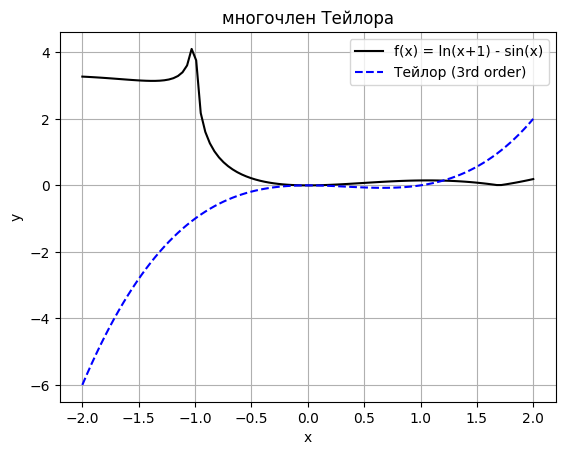

In [60]:
# Будуємо графіки
x_vals = np.linspace(-2, 2, 100)
f_vals = np.array([abs(f.subs(x, xi).evalf()) for xi in x_vals]) #"Cannot convert complex to float", тому abs для хоча б якогось результату
T_vals = np.array([T.subs(x, xi).evalf() for xi in x_vals])

fig, ax = plt.subplots()
ax.plot(x_vals, f_vals, label='f(x) = ln(x+1) - sin(x)', color='black')
ax.plot(x_vals, T_vals, label='Тейлор (3rd order)', color='blue', linestyle='--')
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("многочлен Тейлора")
plt.grid(True)
plt.show()

taylor=         3          2
0.4342 x - 0.6931 x + 0.1106 x - 3.962e-17


<ipython-input-62-2a61857f2e00>:4: RuntimeWarning: invalid value encountered in log
  return np.log(x + 1) - np.sin(x)


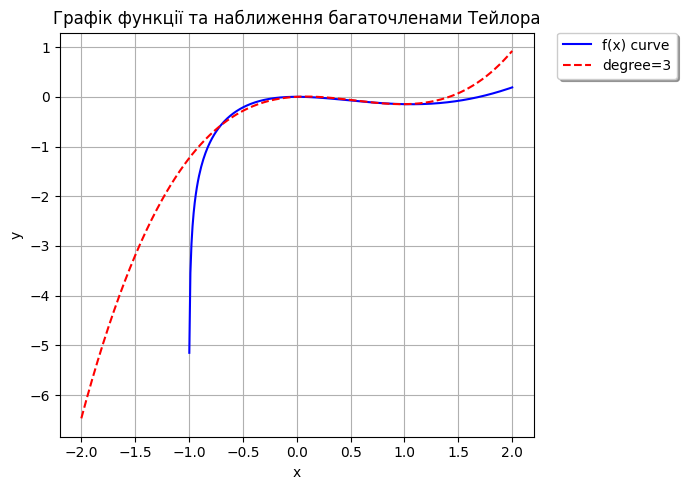

In [62]:
#Побудова багаточлена Тейлора за допомогою approximate_taylor_polynomial
# Задана функція
def f(x):
    return np.log(x + 1) - np.sin(x)


x = np.linspace(-2.0, 2.0, num=400)
degree = 3
taylor = approximate_taylor_polynomial(f, 0, degree, 1)
print('taylor=', taylor)

plt.figure(figsize=(7, 5))
plt.plot(x, f(x), label="f(x) curve", color='blue')

plt.plot(x, taylor(x), label=f"degree={degree}", color='red', linestyle='--' )

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',borderaxespad=0.0, shadow=True)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Графік функції та наближення багаточленами Тейлора")
plt.tight_layout()
plt.grid()
plt.show()